<a href="https://colab.research.google.com/github/tirthachetry/CNN/blob/master/poverty_prediction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Image from google Drives . 
Only required for drive datasets.

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [0]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'poverty less than 30': #Folder contain Glacier Images get the '2' class label.
            label = 0
        elif labels == 'poverty less than 60':
            label = 1
        elif labels == 'poverty more than 60':
            label = 2
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'poverty less than 30', 1:'poverty less than 60', 2:'poverty more than 60'}
    
    return labels[class_code]

In [0]:
train="content/drive/My Drive/dataset/train data"

In [0]:
Images, Labels = get_images('drive/My Drive/dataset/train data/') #Extract the training images from the folders.
Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [36]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (722, 150, 150, 3)
Shape of Labels: (722,)


Let us look some random images of our dataset.

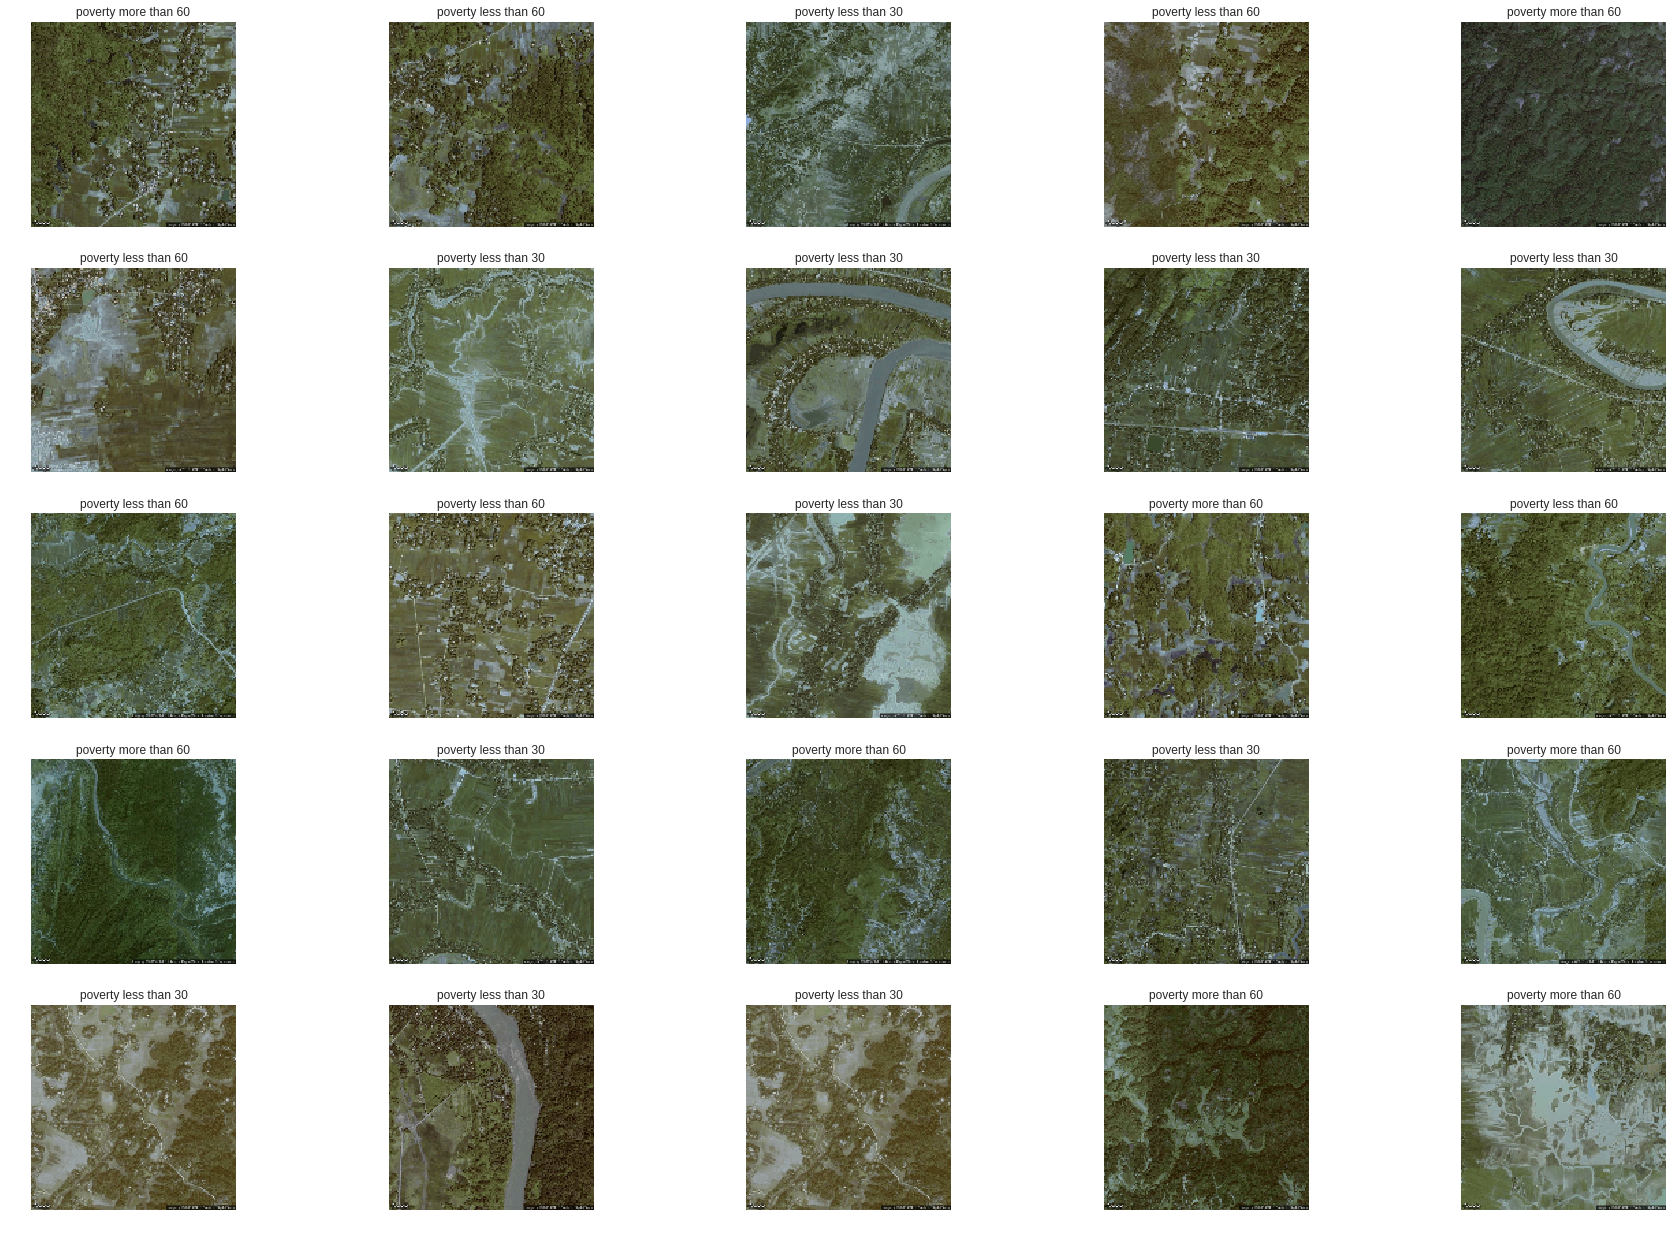

In [37]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

Now, Create the CNN model to predict the class labels.This is the basic CNN model.

In [38]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(3,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)    

Now, lets train the model with validation split equal to 30% from training data. Validation split is used to determine that our model is not geting over-fitted.

In [39]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Train on 505 samples, validate on 217 samples
Epoch 1/35
505/505 [==============================] - 22s 44ms/sample - loss: 1.4630 - acc: 0.3366 - val_loss: 1.1400 - val_acc: 0.3825
Epoch 2/35
505/505 [==============================] - 10s 20ms/sample - loss: 1.1888 - acc: 0.3782 - val_loss: 1.1335 - val_acc: 0.2765
Epoch 3/35
505/505 [==============================] - 10s 20ms/sample - loss: 1.1330 - acc: 0.3347 - val_loss: 1.0934 - val_acc: 0.3456
Epoch 4/35
505/505 [==============================] - 10s 20ms/sample - loss: 1.0962 - acc: 0.3921 - val_loss: 1.0883 - val_acc: 0.3825
Epoch 5/35
505/505 [==============================] - 10s 20ms/sample - loss: 1.0997 - acc: 0.3545 - val_loss: 1.0906 - val_acc: 0.3779
Epoch 6/35
505/505 [==============================] - 10s 20ms/sample - loss: 1.1169 - acc: 0.3485 - val_loss: 1.0907 - val_acc: 0.3502
Epoch 7/35
505/505 [==============================] - 10s 20ms/sample - loss: 1.0994 - acc: 0.3564 - val_loss: 1.0873 - val_acc: 0.3825
Ep

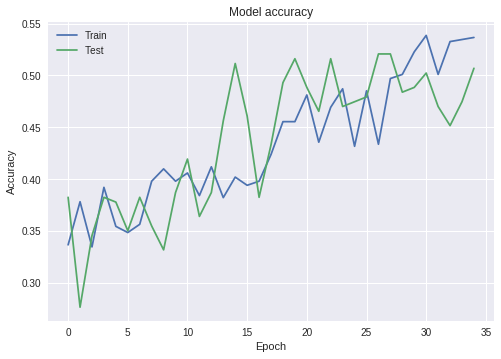

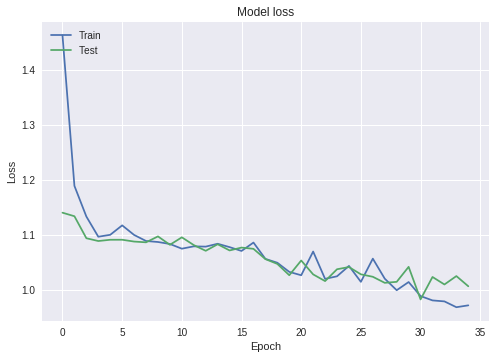

In [40]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

To evaluate a model, there are many methods are proposed to evaluate the model. I use Accuracy to evaluate the performance of my model.

In [41]:
test_images,test_labels = get_images('drive/My Drive/dataset/validation data/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

186/186 [==============================] - 3s 16ms/sample - loss: 1.0335 - acc: 0.4946


[1.0335232109151862, 0.49462366]

Lets predict the images from the "pred" folder.

In [42]:
pred_images,no_labels = get_images('drive/My Drive/dataset/test data/')
pred_images = np.array(pred_images)
pred_images.shape

(78, 150, 150, 3)

Following image shows the predicted class label on top of the image and probabilities below of the image.

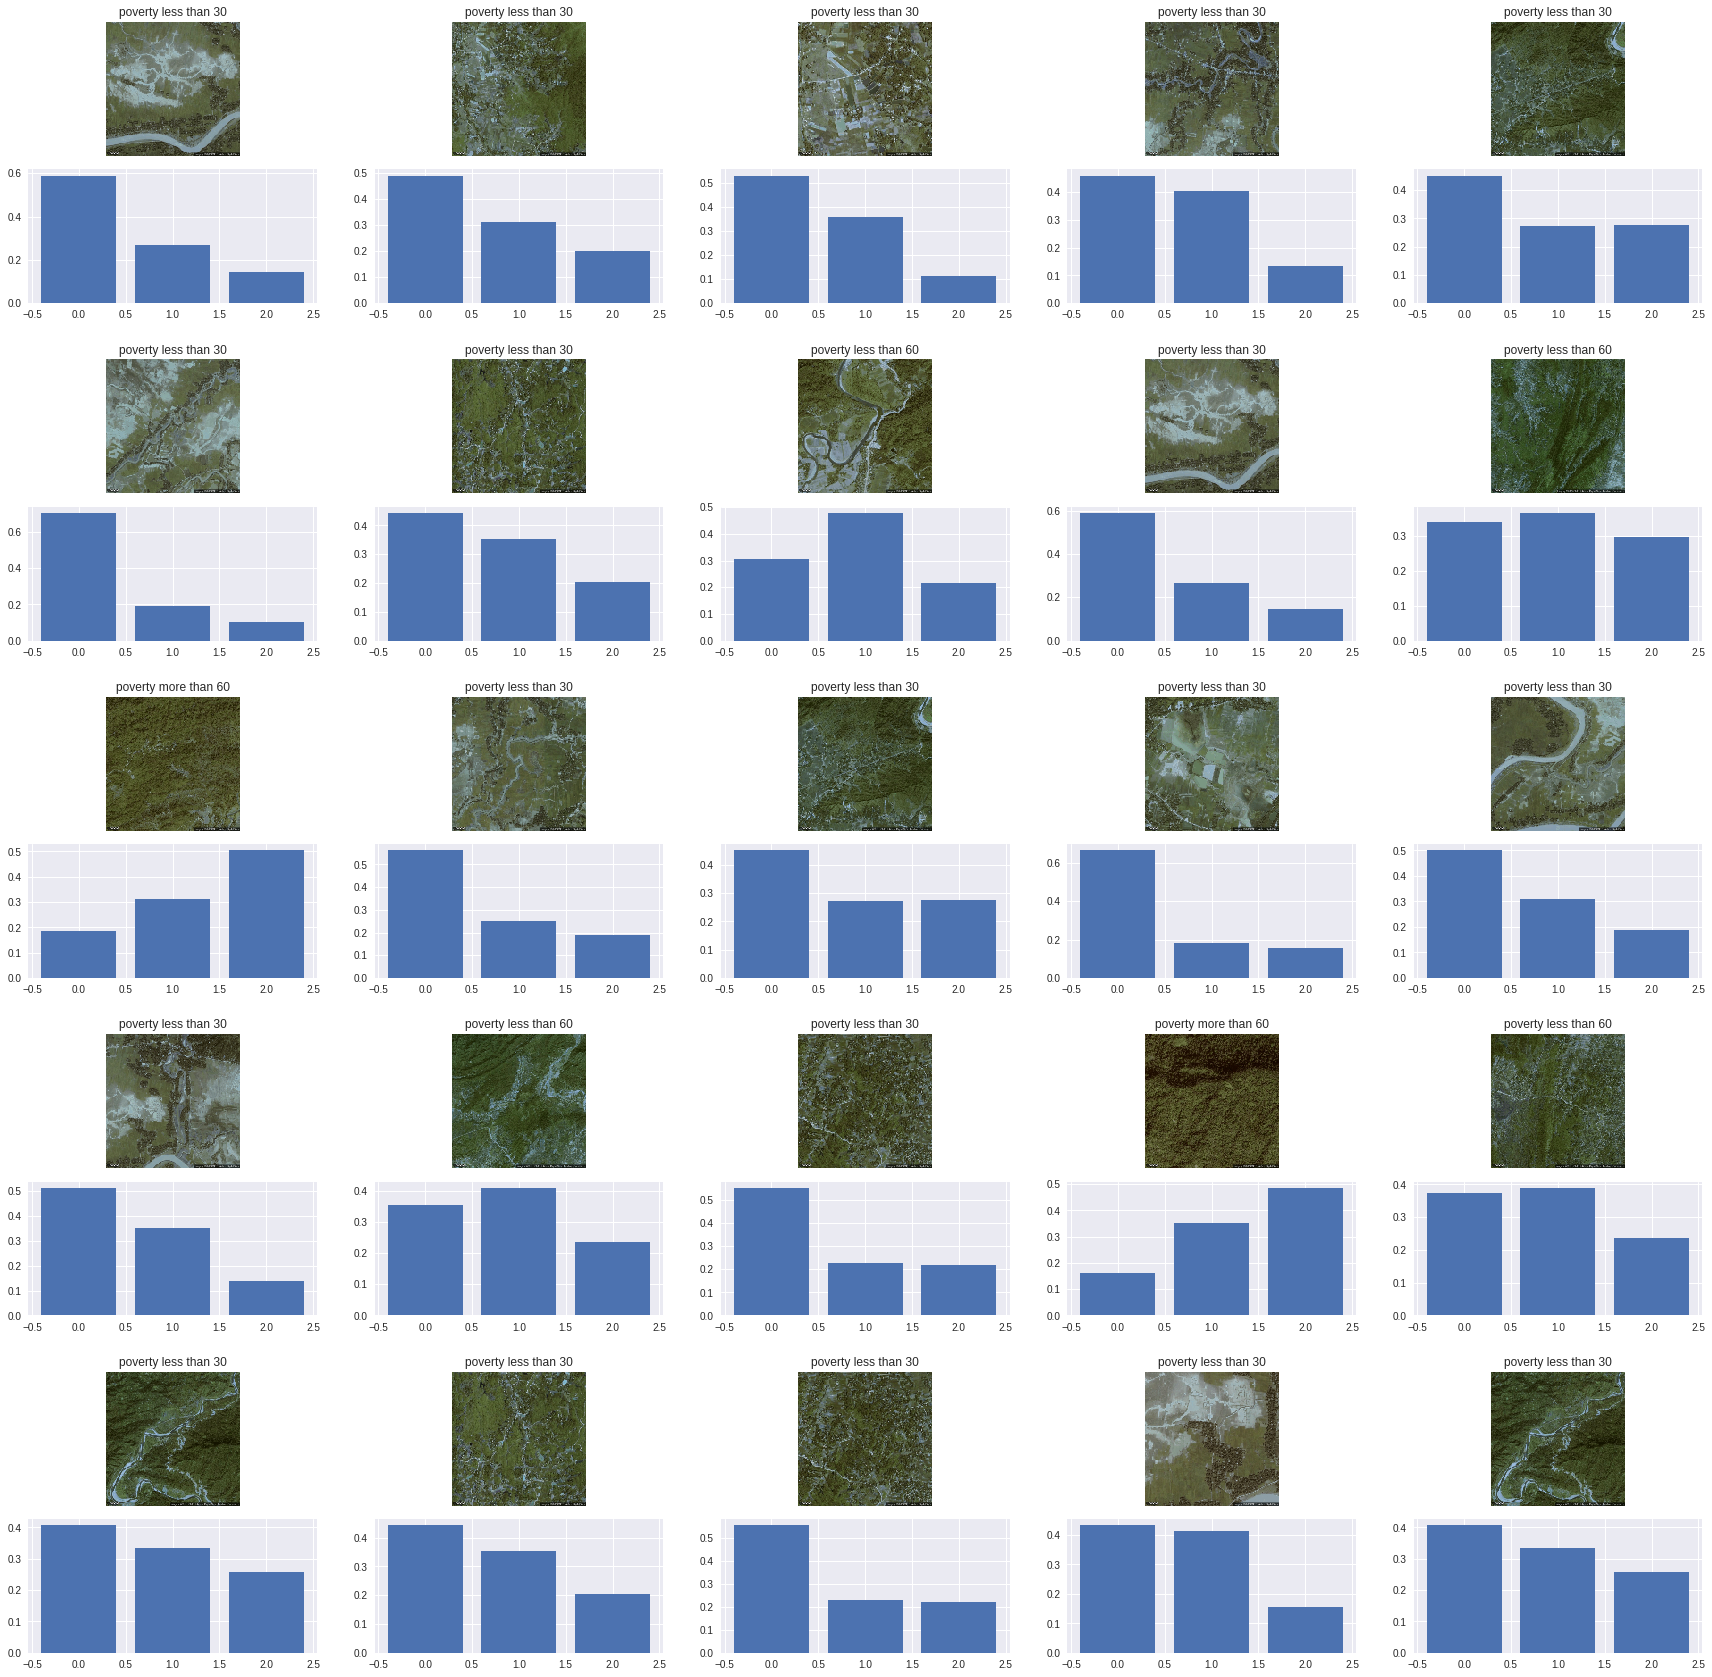

In [45]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(3)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2],pred_prob)
            fig.add_subplot(ax)


fig.show()